# Introduction to Data Science – Homework 4 - 2025
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 7, 2025, 11:59pm.

In this homework, you will study Salt Lake City air quality data and complete an A/B test comparing two ads. 

## Your Data
Fill out the following information: 

*First Name: Nate*   
*Last Name: Hayward*   
*E-mail: nate.hayward@hsc.utah.edu*   
*UID: U6031381*  


In [96]:
# imports and setup 
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: SLC Air Quality Index 

In this problem, you'll study the Air Quality in Salt Lake City. 

### Task 1.0.  Learn about AQI

Read about the [air quality index (AQI)](https://www.airnow.gov/aqi/aqi-basics) and the 
[AirNow](https://www.airnow.gov/about-airnow) system. 


### Task 1.1. Download data
The EPA gives access to historical air quality data at the AirData website. Read about the data available on [this information page](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).


Go to [this website](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the following daily data: 
+ Pollutant = PM2.5
+ Year = 2024
+ City = Salt Lake City, UT
+ Monitor Site = All Sites



Rename the file to SLC_PM2.5.csv

### Task 1.2. Import the data 
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean:

+ The dates are not sorted. 
+ Some dates may have missing values.
+ Some dates may have multiple values corresponding to different sensors (POC=1,2,3,4,5) and different sites.

In [132]:
#Read csv using pandas.read_csv() function to import data
aqi_df = pd.read_csv("SLC_PM2.5.csv")

#Data cleaning

#Ensure date is in proper format 
aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])

#Drop NA dates
aqi_df.dropna(subset=['Date'], axis = 0, inplace=True)

#check data types
#aqi_df.dtypes

#rename column PM25 for easier calling 
aqi_df.rename(columns={'Daily Mean PM2.5 Concentration': 'PM25'}, inplace=True)
#rename column AQI for easier calling 
aqi_df.rename(columns={'Daily AQI Value': 'AQI'}, inplace = True)

aqi_df.head()

#Sort dates 
# grouped = aqi_df.sort_values(by='Date')
# print(grouped.head())


,Date,Source,Site ID,POC,PM25,Units,AQI,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,490352005,1,33.6,ug/m3 LC,97,Copper View,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,2024-01-02,AQS,490352005,1,28.3,ug/m3 LC,87,Copper View,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,2024-01-03,AQS,490352005,1,15.4,ug/m3 LC,63,Copper View,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,2024-01-04,AQS,490352005,1,12.7,ug/m3 LC,58,Copper View,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,2024-01-05,AQS,490352005,1,5.2,ug/m3 LC,29,Copper View,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


* REFERENCES:
* https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-date/


### Task 1.3. Plot the data

1. The data contains multiple PM2.5 concentration and AQI entries for the same date measured at different sites and with different sensors (POCS). Plot average PM2.5 and AQI values with respect to date in a single figure. Anyone analysing the graph should be able to answer, what is the average PM 2.5 concentration or the AQI value on a particular date. 

2. Plot the average PM 2.5 concentration vs Date for two different sites (site ids - 490353015 and 490450004). Note in this case the average is just taken over POCs. Plot for both the sites should be in a single figure.
*Hint*: use the pandas groupby function


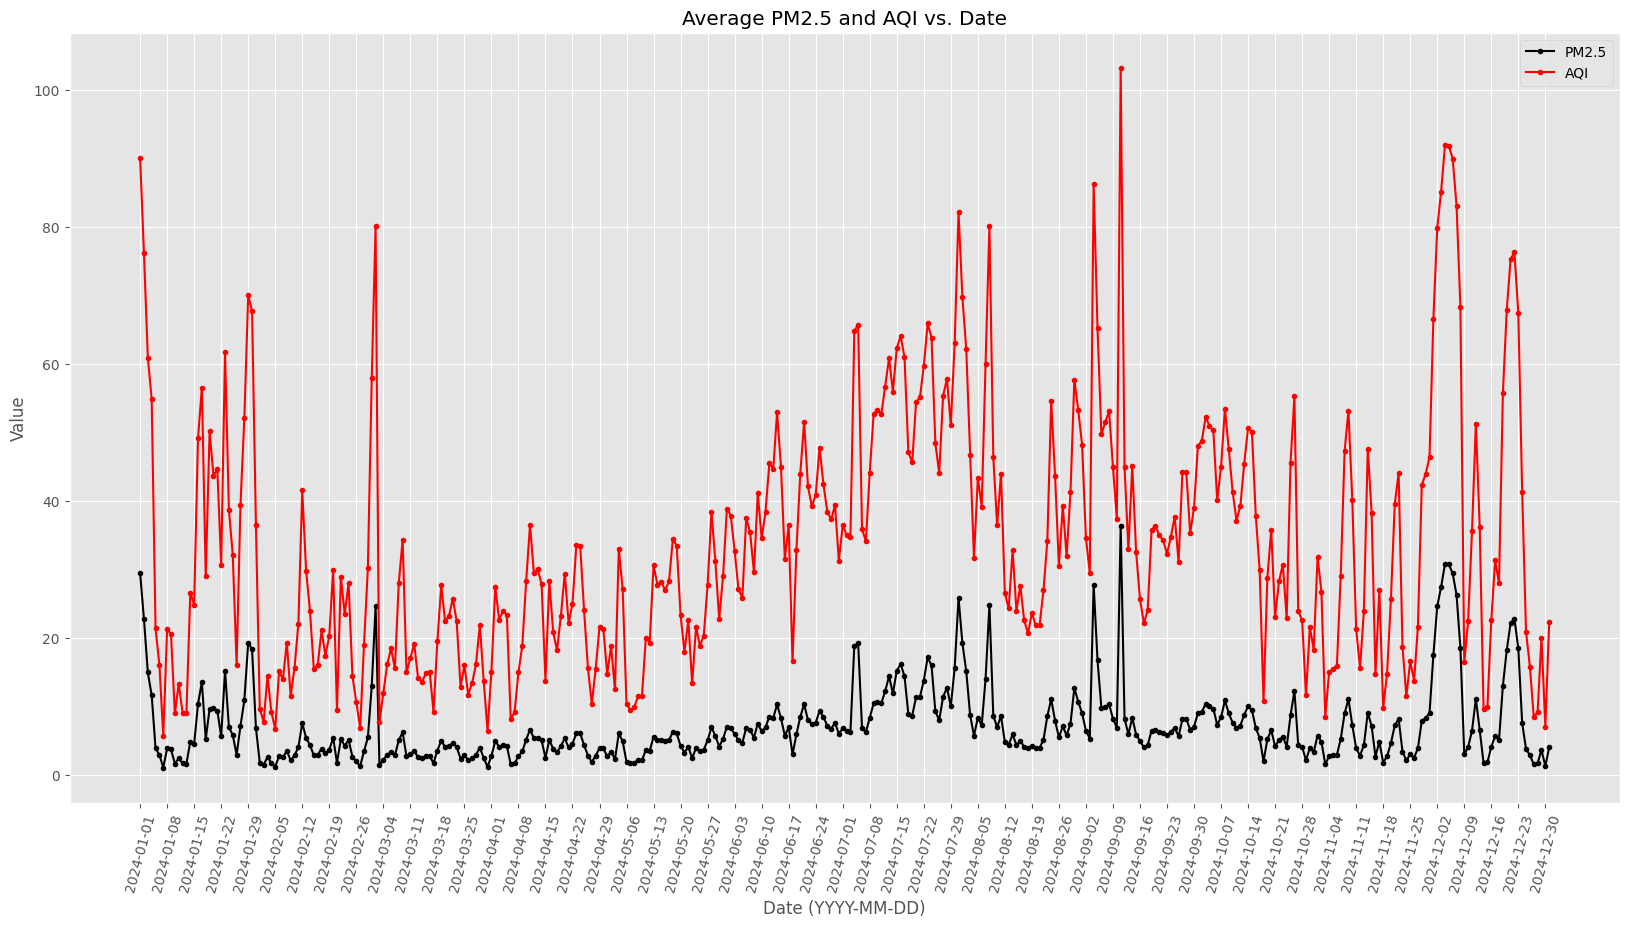

In [135]:
#manipulate dataframe and plot 

#Create data for average PM2.5 and AQI values vs. date in single figure
pm25_counts = aqi_df.groupby('Date')['PM25'].mean() #creates average of PM25 grouped on Date
aqi_counts = aqi_df.groupby('Date')['AQI'].mean() #creates average of AQI grouped on Date

pm25_counts = pm25_counts.sort_index() #sorts PM25 counts to ensure they are in order by date
aqi_counts = aqi_counts.sort_index() #sorts AQI counts to ensure they are in order by date

#Create plot of both PM2.5 and AQI
plt.figure(figsize=(20, 10))
plt.plot(pm25_counts.index, pm25_counts, label="PM2.5", marker=".", linestyle="-", color = 'black')
plt.plot(aqi_counts.index, aqi_counts, label="AQI", marker=".", linestyle="-", color = 'red')

#Format graph axis/title
plt.xlabel("Date (YYYY-MM-DD)")
plt.ylabel("Value")
plt.title("Average PM2.5 and AQI vs. Date")
plt.legend(loc = 'best') 
plt.xticks(pm25_counts.index[::7], rotation=75)  #Show every 7th date for readability (was too dense with every date on x-axis
plt.show()

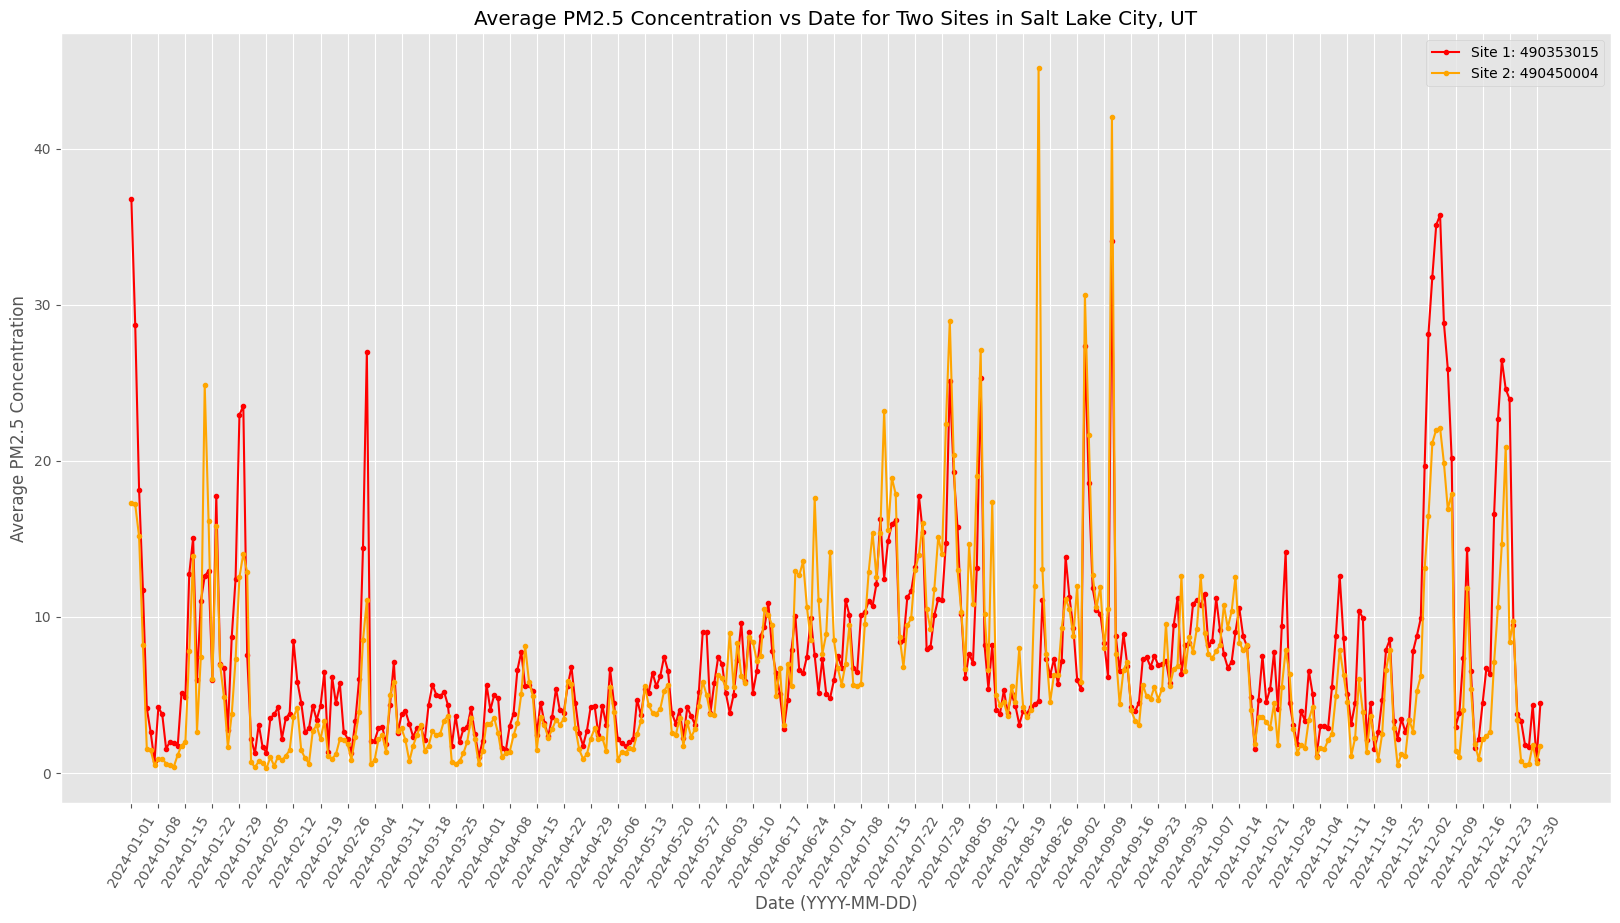

In [138]:
#create new DF for site 1 with ID = 490353015
site1 = aqi_df['Site ID'] == 490353015
#create new DF for site 1 with ID = 490450004
site2 = aqi_df['Site ID'] == 490450004

#redefine df with above mask
site1 = aqi_df[site1]
site2 = aqi_df[site2]

#Check shape of site dfs 
# print(site1.shape)
# print(site2.shape)

#create pm25 counts for site1 and site2 grouped by dates
pm25_counts1 = site1.groupby('Date')['PM25'].mean() #creates average of PM25 grouped on Date site 1
pm25_counts2 = site2.groupby('Date')['PM25'].mean() #creates average of PM25 grouped on Date site 2

# commented out because not in line with question prompt but wanted to view result 
# #create AQI counts for site1 and site2 grouped by dates
# aqi_counts1 = site1.groupby('Date')['AQI'].mean() #creates average of AQI grouped on Date site1 
# aqi_counts2 = site2.groupby('Date')['AQI'].mean() #creates average of AQI grouped on Date site2 

#Plot PM2.5 for both sites
plt.figure(figsize=(20, 10))

#Site1 PM2.5
plt.plot(pm25_counts1.index, pm25_counts1, label="Site 1: 490353015", marker=".", linestyle="-", color='red')
#Site2 PM2.5
plt.plot(pm25_counts2.index, pm25_counts2, label="Site 2: 490450004", marker=".", linestyle="-", color='orange')
# commented out because not in line with question prompt but wanted to view result 
# #Site1 AQI
# plt.plot(aqi_counts1.index, aqi_counts1, label="Site 1: 490353015", marker=".", linestyle="-", color='black')
# #Site2 AQI
# plt.plot(aqi_counts2.index, aqi_counts2, label="Site 2: 490450004", marker=".", linestyle="-", color='blue')

#Format graph axis/title
plt.xlabel("Date (YYYY-MM-DD)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Average PM2.5 Concentration vs Date for Two Sites in Salt Lake City, UT")
plt.legend(loc='best')
plt.xticks(pm25_counts.index[::7],rotation=60) #Show every 7th date for readability (was too dense with every date on x-axis)
plt.show()


## Part 2: A/B testing

First read the WIRED article on A/B testing [here](http://www.wired.com/2012/04/ff_abtesting/).

Suppose your company is developing a new slogan. The marketing department designed two slogans: ‘Slogan A’ and ‘Slogan B’, shown below. 
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)
Your job is to figure out which slogan is better. 


You decide to conduct the following experiment. You use Instagram ads to buy 12000 impressions. In $N_A=6000$ of the ads (randomly chosen), you use Slogan A and in the other $N_B=6000$ ads, you use Slogan B. Then you see which slogan attracts more clicks.

It turns out that $n_A=1700$ Slogan A viewers click on the ad while $n_B=2100$ Slogan B viewers click on the ad. Obviously Slogan B did better in this test, but is the difference *significant* enough to say that Slogan B is better? Or, perhaps, Slogan B just got lucky in this test? 

The goal of this exercise will be to conduct a two-proportion z-test to determine if Slogan B is better. The steps will be similar to those from Lecture 7 used for the 1954 Salk polio-vaccine experiment.

### Task 2.1.  Formulate null hypothesis 

Let $p_A = n_A/N_A$ be the proportion of clicks on Slogan A and $p_B = n_B/N_B$ be the proportion of clicks on Slogan B. 

In terms of $p_A$ and $p_B$, clearly state the null and alternative hypothesis. 

Here we have 2 independent samples of binary categorical variables so we must compare the proportions with a two-sample $z$-test.

Therefore, based on the information above it follows:

Let $p_A$ and $p_B$ be the proportions of clicks for Slogan A and Slogan B respectively, as defined above. 

The null hypotehesis is therefore given as:
$$
\begin{align*} 
H_0: p_A &= p_B \\
\end{align*}
$$
There is no difference in the slogans - neither Slogan A nor Slogan B are better.

The alternative hypothesis is given as: 

$$
\begin{align*} 
H_A: p_A &\ne p_B
\end{align*}
$$

There is a significant difference in the slogans. Slogan A is significantly lower than Slogan B or Slogan B is significantly higher than Slogan A. 

For the purpose of this test, a significance level of $\alpha = 0.01$ was chosen. 

Based on the information above, the results of the ad campaign are as follows: 
$$
\begin{aligned}
&\text{Slogan A:} \quad N_A = 6000, \quad n_A = 1700 \\
&\text{Slogan B:} \quad N_B = 6000, \quad n_B = 2100.
\end{aligned}
$$

### Task 2.2.  Find the two-proportion z-value  

Assuming the null hypothesis, we know from lecture that the test statistic, called the *two-proportion z-value*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
is approximately  distributed according to the standard normal distribution. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 


Find the two-proportion z-value.

In [130]:
import math

#set sample variables with sample size and values of test 
na = 1700
nb = 2100
Na = 6000
Nb = 6000

#calculate proportions
pa = na/Na
pb = nb/Nb

#compute overall sample proportion for Z score calculation
psample = (na + nb)/(Na + Nb)
qsample = 1 - psample

#compute Z-score with two-proportion Z-value formula as given above
Z = (pa - pb) / (math.sqrt((psample*qsample)*((1/Na) + (1/Nb))))

print(f'The two-proportion Z-value is {Z:.4f}.')

The two-proportion Z-value is -7.8497.


### Task 2.3. Complete the two proportion z-test 

Find the $p$-value for the hypothesis test. Do this first using the normal cdf function and then check your answer by running a two proportions z-test in python with the proportions_ztest function. 

In [129]:
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

#calculate p-value using normal cdf for two-tailed ztest
p_manual = 2 * (1 - norm.cdf(abs(Z)))

print(f'The manual p-value given normal cdf function is: {p_manual}')

#calculate p-value using proportions_ztest
counts = [1700, 2100]
sample_sizes = [6000, 6000]

z, pval = proportions_ztest(counts, sample_sizes, alternative = 'two-sided')

print(f'The two-proportions z-test with the proportions_ztest function is: {z:.4f} and the p-value is {pval}')

The manual p-value given normal cdf function is: 4.218847493575595e-15
The two-proportions z-test with the proportions_ztest function is: -7.8497 and the p-value is 4.171039149061205e-15


#### Interpretation
* The Z-score computed both manually and with the proportions_ztest function are the same at -7.8497
* The p-value computed by both methods is also the same and is significantly lower than $\alpha = 0.01$ and therefore we can reject the null hypothesis
* Based on this we can state that Slogan B is significantly higher than Slogan A, Slogan B is better.

#### References 
* https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/z-test/
* https://support.minitab.com/en-us/minitab/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/manually-calculate-a-p-value/#:~:text=an%20upper%2Dtailed%20test%20is,1%20%2D%20cdf(%7Cts%7C)